In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
crime = pd.read_csv('Crime_Data.csv')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29448 entries, 0 to 29447
Data columns (total 8 columns):
RecordID        29448 non-null int64
Offense         29448 non-null object
IncidentID      29448 non-null int64
BlockNumber     28862 non-null float64
StreetName      29446 non-null object
Agency          29448 non-null object
DateReported    29448 non-null object
HourReported    29448 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.8+ MB


In [3]:
crime.head()

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported
0,1001,Assist Citizen - Misc,201900020274,1600.0,MADISON AVE,CPD,2019-07-20T07:17:08.000Z,317
1,1002,Shots Fired/Illegal Hunting,201900020273,NaN,10TH ST NW / ANDERSON ST,CPD,2019-07-20T06:47:42.000Z,247
2,1003,Shots Fired/Illegal Hunting,201900020272,800.0,ROSE HILL DR,CPD,2019-07-20T06:25:22.000Z,225
3,1004,Suspicious Activity,201900020258,100.0,MADISON LN,CPD,2019-07-20T03:46:00.000Z,2346
4,1005,Vandalism,201900020252,800.0,W MAIN ST,CPD,2019-07-20T02:36:17.000Z,2236


In [4]:
crime.columns

Index(['RecordID', 'Offense', 'IncidentID', 'BlockNumber', 'StreetName',
       'Agency', 'DateReported', 'HourReported'],
      dtype='object')

In [5]:
# RecordID are all unique values, doesn't tell us anything
vals, counts = np.unique(crime['RecordID'], return_counts=True)
np.all(counts == 1)

True

In [6]:
# Agency is just CPD, doesn't tell us anything
np.unique(crime['Agency'])

array(['CPD'], dtype=object)

In [7]:
# IncidentID are all unique, doesn't tell us anything
vals, counts = np.unique(crime['IncidentID'], return_counts=True)
np.all(counts == 1)

True

In [8]:
# safe to remove RecordID, Agency, IncidentID
crime = crime.drop(columns=['RecordID', 'Agency', 'IncidentID'])

In [9]:
crime['BlockString'] = crime['BlockNumber'].apply(lambda x: '' if np.isnan(x) else int(x))
crime['Address'] = crime['BlockString'].astype(str)+' '+crime['StreetName']+', Charlottesville VA'
crime.to_csv('crime_data-addresses.csv', columns=['Address'])

In [10]:
vals, counts = np.unique(crime['Offense'], return_counts=True)
sorted(list(zip(vals, counts)), key=lambda x: x[1])

[('Alarm - Intentional', 1),
 ('Alarm - True', 1),
 ('Alarm - Unknown', 1),
 ('Alarm - Weather Related', 1),
 ('Assist', 1),
 ('Child Abuse', 1),
 ('Curfew/Loitering/Vagrancy', 1),
 ('Field Interview', 1),
 ('Fire Alarm - No Fire', 1),
 ('Impersonating a Police Officer', 1),
 ('Prostitution-assisting/promoting', 1),
 ('Traffic - Abandoned Vehicle', 1),
 ('Alarm-Accidental', 2),
 ('Civil Problem', 2),
 ('Open Door/Window', 2),
 ('Prostitution', 2),
 ('Sex Offense-statutory rape', 2),
 ('Tactical Crime Initiative - TCI', 2),
 ('Bad Check', 3),
 ('Fraud-welfare', 3),
 ('Noise Complaint', 3),
 ('Suspicious Vehicle', 3),
 ('Assisted on Prev Reported', 4),
 ('Attemped Suicide', 4),
 ('Computer Crime', 4),
 ('False Report of Crime', 4),
 ('Sex Offense - Assault w/Object', 4),
 ('Solicitation illegal w/o permit', 4),
 ('Crisis Assessment', 5),
 ('Fireworks Violation', 5),
 ('Traffic - Traffic Hazard', 5),
 ('Homicide-murder/non-negligent', 7),
 ('Identity Theft', 7),
 ('Larceny - From Coin Ope

In [11]:
# converted addresses to latlong using separate program ArcGIS Pro, reading the output here
crime_arcgis = pd.read_csv('crime_data-arcgis-output.csv')
crime['X'], crime['Y'] = crime_arcgis['X'], crime_arcgis['Y']
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661


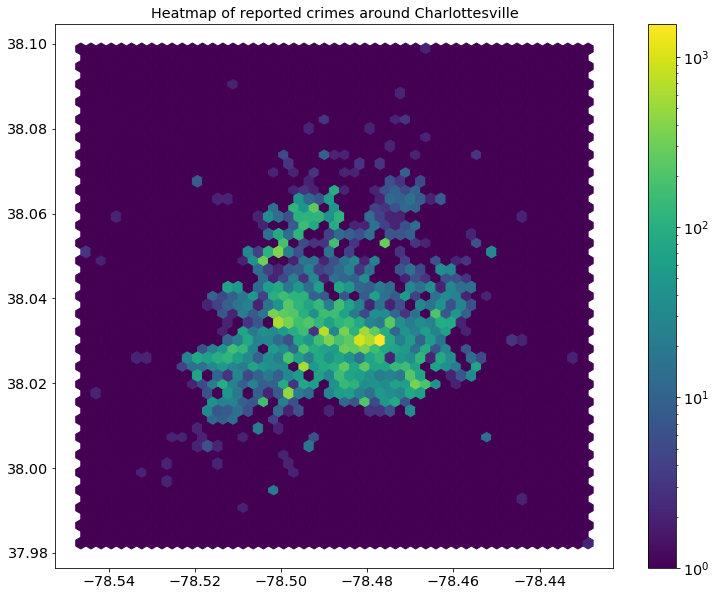

In [12]:
Xmin = -78.556730
Xmax = -78.427396
Ymin = 37.978503
Ymax = 38.103614
# 37.978503, -78.556730 left bottom
# 38.103614, -78.427396 right top
crime = crime[crime.X > Xmin]
crime = crime[crime.X < Xmax]
crime = crime[crime.Y > Ymin]
crime = crime[crime.Y < Ymax]

plt.figure(figsize=(12.5, 10))
plt.hexbin(crime.X, crime.Y, gridsize=50, bins='log')
plt.title('Heatmap of reported crimes around Charlottesville')
plt.colorbar()
plt.savefig('crime_data-heatmap-austin')

In [13]:
vals, counts = np.unique(crime.Y, return_counts=True)

In [14]:
vals[counts.argmax()]

38.03030194

In [15]:
vals, counts = np.unique(crime.Address.astype(str), return_counts=True)

In [16]:
sorted(list(zip(vals, counts)), key=lambda x: x[1], reverse=True)
# 600 E Market Street seems to have something going on...

[('600 E MARKET ST, Charlottesville VA', 1114),
 ('700 PROSPECT AVE, Charlottesville VA', 511),
 ('1100 5TH ST SW, Charlottesville VA', 360),
 ('800 HARDY DR, Charlottesville VA', 346),
 ('400 GARRETT ST, Charlottesville VA', 311),
 ('1100 EMMET ST N, Charlottesville VA', 309),
 ('1400 MELBOURNE RD, Charlottesville VA', 284),
 ('800 W MAIN ST, Charlottesville VA', 284),
 ('500 PARK ST, Charlottesville VA', 237),
 ('1400 HAMPTON ST, Charlottesville VA', 229),
 ('1500 UNIVERSITY AVE, Charlottesville VA', 214),
 ('900 1ST ST S, Charlottesville VA', 200),
 ('900 EMMET ST N, Charlottesville VA', 198),
 ('500 W MAIN ST, Charlottesville VA', 194),
 ('1900 EMMET ST N, Charlottesville VA', 186),
 ('200 W WATER ST, Charlottesville VA', 184),
 ('1400 UNIVERSITY AVE, Charlottesville VA', 172),
 ('1500 DAIRY RD, Charlottesville VA', 169),
 ('200 E MAIN ST, Charlottesville VA', 165),
 ('200 W MAIN ST, Charlottesville VA', 164),
 ('1300 CARLTON AVE, Charlottesville VA', 157),
 ('100 LANKFORD AVE, Cha

In [17]:
crime['TimeReported'] = crime['DateReported'].apply(lambda dt_string: datetime.strptime(dt_string, "%Y-%m-%dT%H:%M:%S.000Z"))
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y,TimeReported
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532,2019-07-20 07:17:08
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433,2019-07-20 06:47:42
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255,2019-07-20 06:25:22
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610,2019-07-20 03:46:00
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661,2019-07-20 02:36:17


In [18]:
# convert from UTC back to local time
# taken from https://stackoverflow.com/questions/4770297/convert-utc-datetime-string-to-local-datetime
def to_local(utc):
    from_zone = tz.gettz('UTC')
    to_zone = tz.gettz('America/New_York')
    utc = utc.replace(tzinfo=from_zone)
    return utc.astimezone(to_zone)

crime['LocalTimeReported'] = crime['TimeReported'].apply(to_local)
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y,TimeReported,LocalTimeReported
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532,2019-07-20 07:17:08,2019-07-20 03:17:08-04:00
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433,2019-07-20 06:47:42,2019-07-20 02:47:42-04:00
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255,2019-07-20 06:25:22,2019-07-20 02:25:22-04:00
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610,2019-07-20 03:46:00,2019-07-19 23:46:00-04:00
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661,2019-07-20 02:36:17,2019-07-19 22:36:17-04:00


In [19]:
def to_seconds(timestamp):
    return timestamp.hour*3600 + timestamp.minute*60 + timestamp.second
crime['SecondOfDay'] = crime['LocalTimeReported'].apply(to_seconds)
crime['Time_cos'] = crime['SecondOfDay'].apply(lambda x: np.cos(2*np.pi*x / 86400))
crime['Time_sin'] = crime['SecondOfDay'].apply(lambda x: np.sin(2*np.pi*x / 86400))
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y,TimeReported,LocalTimeReported,SecondOfDay,Time_cos,Time_sin
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532,2019-07-20 07:17:08,2019-07-20 03:17:08-04:00,11828,0.652319,0.757945
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433,2019-07-20 06:47:42,2019-07-20 02:47:42-04:00,10062,0.744020,0.668157
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255,2019-07-20 06:25:22,2019-07-20 02:25:22-04:00,8722,0.805498,0.592599
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610,2019-07-20 03:46:00,2019-07-19 23:46:00-04:00,85560,0.998135,-0.061049
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661,2019-07-20 02:36:17,2019-07-19 22:36:17-04:00,81377,0.934023,-0.357214


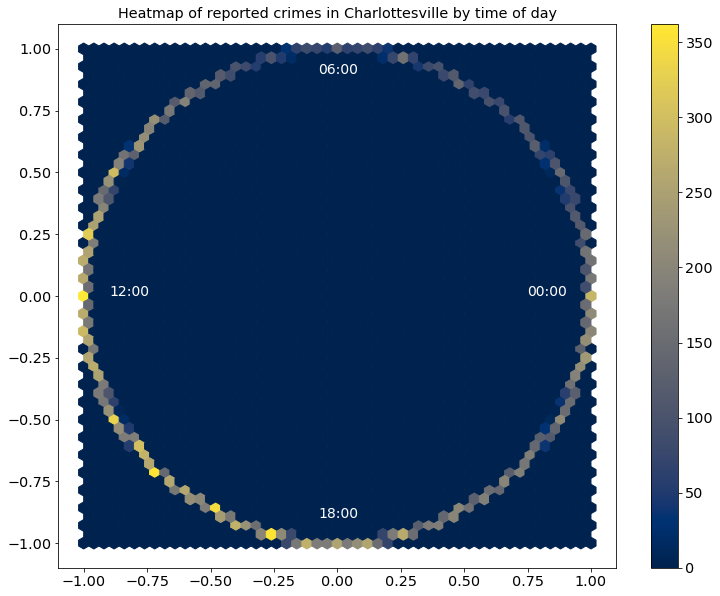

In [20]:
# midnight 0:00 is (cos, sin) = (1, 0)
# 6am 6:00 is (cos, sin) = (0, 1)

plt.figure(figsize=(12.5,10))
plt.hexbin(crime.Time_cos, crime.Time_sin, gridsize=50, cmap='cividis')
plt.title('Heatmap of reported crimes in Charlottesville by time of day')
plt.colorbar()
plt.text(.75, 0, '00:00', fontsize=14, color='white')
plt.text(-.075, .9, '06:00', fontsize=14, color='white')
plt.text(-.9, 0, '12:00', fontsize=14, color='white')
plt.text(-.075, -.9, '18:00', fontsize=14, color='white')
plt.savefig('crime_data-time-heatmap-austin')

In [21]:
crime.head()

,Offense,BlockNumber,StreetName,DateReported,HourReported,BlockString,Address,X,Y,TimeReported,LocalTimeReported,SecondOfDay,Time_cos,Time_sin
0,Assist Citizen - Misc,1600.0,MADISON AVE,2019-07-20T07:17:08.000Z,317,1600,"1600 MADISON AVE, Charlottesville VA",-78.486731,38.041532,2019-07-20 07:17:08,2019-07-20 03:17:08-04:00,11828,0.652319,0.757945
1,Shots Fired/Illegal Hunting,NaN,10TH ST NW / ANDERSON ST,2019-07-20T06:47:42.000Z,247,,"10TH ST NW / ANDERSON ST, Charlottesville VA",-78.502296,38.036433,2019-07-20 06:47:42,2019-07-20 02:47:42-04:00,10062,0.744020,0.668157
2,Shots Fired/Illegal Hunting,800.0,ROSE HILL DR,2019-07-20T06:25:22.000Z,225,800,"800 ROSE HILL DR, Charlottesville VA",-78.469232,38.022255,2019-07-20 06:25:22,2019-07-20 02:25:22-04:00,8722,0.805498,0.592599
3,Suspicious Activity,100.0,MADISON LN,2019-07-20T03:46:00.000Z,2346,100,"100 MADISON LN, Charlottesville VA",-78.492631,38.036610,2019-07-20 03:46:00,2019-07-19 23:46:00-04:00,85560,0.998135,-0.061049
4,Vandalism,800.0,W MAIN ST,2019-07-20T02:36:17.000Z,2236,800,"800 W MAIN ST, Charlottesville VA",-78.490886,38.031661,2019-07-20 02:36:17,2019-07-19 22:36:17-04:00,81377,0.934023,-0.357214


In [33]:
X = crime[['X', 'Y', 'Time_cos', 'Time_sin']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

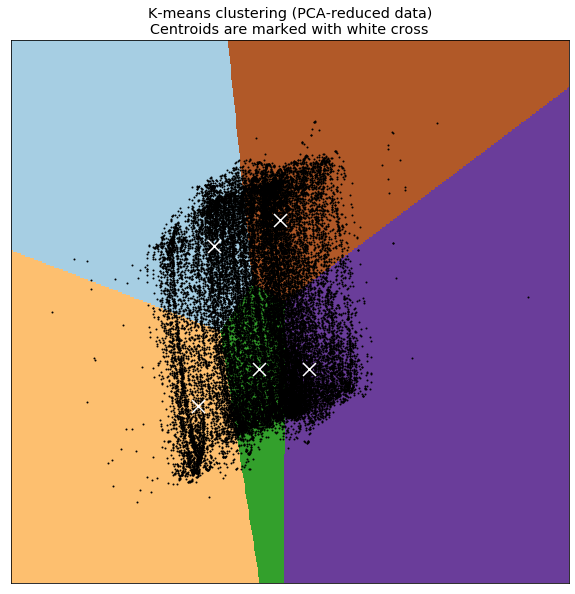

In [34]:
# taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

data = X

n_samples, n_features = data.shape
n_clusters = 5

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('clusters')